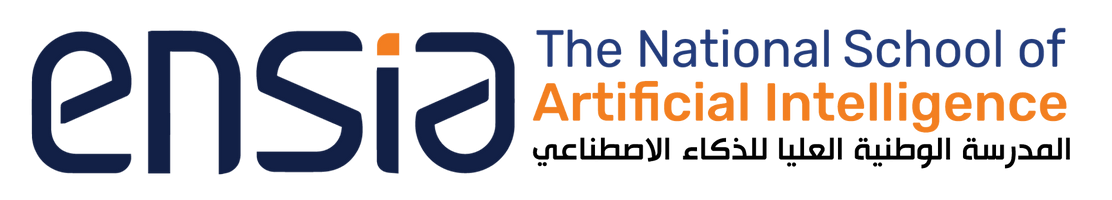

---
# **Introduction to Artificial Intelligence**

> ## Lab 6 (Week 7) --Search Algorithms: Part 2
*Informed Search*

## Objectives
> - **Enhance the Travel Planning Problem:** Incorporate geographical coordinates and actual distances.
- **Implement Uninformed Search Strategies:**
  - **Depth-Limited Search (DLS)**: A variation of Depth-First Search (DFS) that limits the search depth to a predefined maximum to prevent infinite exploration.
  - **Iterative Deepening Search (IDS)**: Repeatedly applies Depth-Limited Search (DLS) with increasing depth limits until the goal is found.
  - **Uniform Cost Search (UCS)**: Selects the next node based solely on the actual cost.
- **Implement Informed Search Strategies:**
  - **Best-First Search:** Selects the next node based solely on the heuristic value.
  - **A\* Search:** Combines actual cost and heuristic estimate to guarantee optimality.

## Overview:
>- In *LAB 5*, you effectively implemented the **General Graph Search** algorithm, successfully solving both the provided Eight Puzzle problem and the previously defined Travel Planning problem using some Uninformed search strategies (BFS and DFS).

>- In this current lab, your task is to extend the Travel Planning problem from LAB 5 by incorporating additional information. Additionally, you are required to implement and test the following five strategies: **Depth-Limited Search**, **Iterative Deepening Search**, **Uniform Cost Search** , **Best First Search** and **A*** with the newly formulated problem.

>- Building on the travel planning problem from *Lab 5*, you need to modify the `TravelPlanProblem` class to incorporate additional parameters: the **geographical coordinates** of each wilaya and the **actual distances** between them.

>- The updated transition model (`state_transition_model`) already accounts for these factors. However, further adjustments are required in the `TravelPlanProblem` class to effectively integrate this new information, ensuring compatibility with the **Informed Search** strategies.

## 🛠️ Your Tasks:

> #### **1- Complete the code:**

>You are required to implement the following two functions within the **TravelPlanProblem** class according to the comments provided in the lab sheet:

>1. **expand_node:**  
   - **Objective:** Generate child nodes (neighbors) for a given node based on its valid actions.  
   - **Guidance:** Use the description in the comments to determine how to create each child node (including updating costs and evaluation functions).

>2. **get_total_cost:**  
   - **Objective:** Calculate the total cost for a node by combining the cumulative cost (g) and, if enabled, a heuristic estimate.  
   - **Guidance:** Follow the comments to correctly integrate both the actual cost and the heuristic component.

>3. Use the provided toy test function `toy_test_travel_plan_problem_class()` to verify your implementations. Make sure your functions behave as expected based on the comments and the toy test outputs.

>4. Complete the **GeneralSearch** class and the **iterative_deepening_search** function. You are required to finish the missing steps marked as **TODO** in the comments.

>#### **2- Testing Your Implementation:**
To verify your implementation of the search algorithms for the Travel Planning problem, follow these detailed steps:

>1. **Test Individual Search Strategies:**
   - The testing setup includes a function called `test_strategy` which runs a specific search strategy (e.g., Breadth-First, Depth-First, Uniform Cost, Best-First, A*, etc.).
   - For each strategy, the test will print:
     - A header identifying the search method.
     - The solution path (a list of states from the initial city to the goal).
     - The actual path cost (cumulative travel cost).
     - The total evaluation cost (which may include heuristic values if applicable).

>2. **Run the Comprehensive Test Suite:**
   - Use the provided `run_tests()` function to execute all the tests at once.
   - This function will sequentially run tests for all specified search strategies (BFS, DFS, Depth-Limited, Iterative Deepening, UCS, Best-First, and A*).
   - Watch the output in the console for each strategy to ensure that:
     - The solution path is correctly reconstructed.
     - The cost values and depth information match the expected outcomes.

>3. **Analyze the Results:**
   - Compare the outputs across different strategies to understand their performance.
   - Verify that each strategy is exploring the state space as intended and converges on a valid solution.
   - For Iterative Deepening Search (IDS), observe that the depth limit increases gradually until the goal is found.

>4. **Troubleshooting:**
   - If a particular strategy does not yield a solution or if the printed path/costs seem incorrect, review your implementations in the corresponding sections (especially the `GeneralSearch.search()` and `iterative_deepening_search()` functions).
   - Double-check the state transition model and ensure that all functions are integrated correctly.

## 📌 **Homework: Implement Iterative Deepening A* (IDA*)**
>You are tasked with implementing the **Iterative Deepening A* (IDA*)** search algorithm.  
IDA* is an optimized version of A* that uses iterative deepening to avoid excessive memory usage. Instead of maintaining an open set (like A*), it performs depth-first searches with a gradually increasing cost threshold.

>### ✏️ **Hints for Implementation:**

>- IDA* starts with an initial threshold equal to the f-value (`f = g + h`) of the start node.
- It then performs a **depth-first search (DFS)**, but **prunes nodes** that exceed the current threshold.
- If the goal is found within the threshold, return the solution.
- Otherwise, update the threshold to the **minimum f-value that exceeded the current limit** and repeat the process.

>### **How to Modify the Existing Code:**

>1. **Modify the `GeneralSearch` class** to support IDA*.
2. **Create a new `search_ida_star` method** that initializes the threshold and calls a recursive function.
3. **Implement a recursive depth-first function** that:
   - Returns a goal node if found.
   - If the node's f-value exceeds the threshold, returns the lowest threshold exceeded.
   - Otherwise, continues exploring child nodes.
4. **Update the `search` method** to call `search_ida_star` when `search_strategy="IDA*"`.

>By implementing IDA*, you will optimize memory usage while still ensuring an optimal solution, making it a more efficient alternative to A-star in large search spaces. 🚀


The pseudocode for Depth-First Search (DFS) and Iterative Deepening Search (IDS) is provided below.

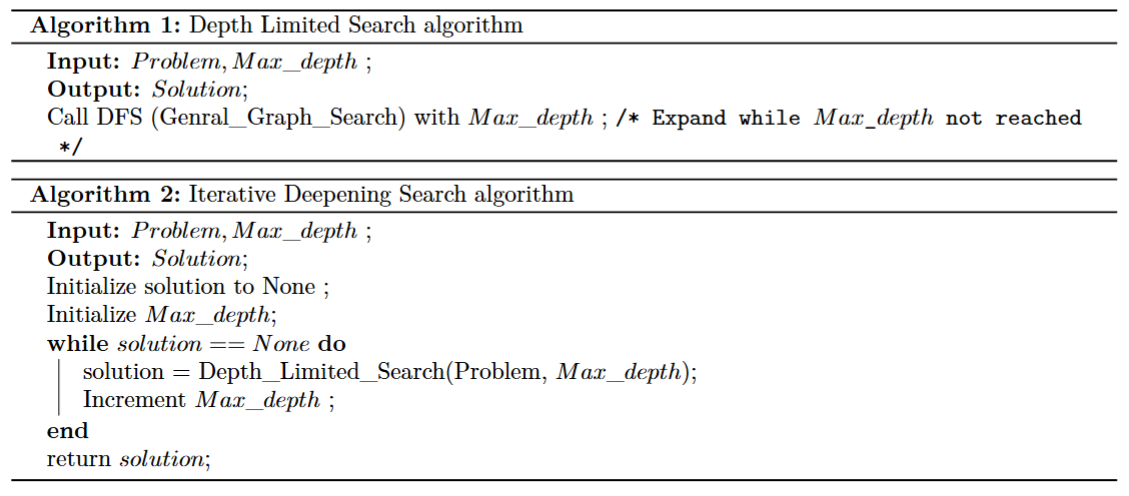

> ### Node representation


In [ ]:
import queue
from math import radians, sin, cos, sqrt, atan2
from copy import deepcopy

# ------------------------------
# 1. Node Class Definition
# ------------------------------
class Node:
    def __init__(self, state, parent=None, action=None, g=0, f=0):
        """
        Initialize a search tree node.

        Input Parameters:
            - state: The state represented by this node (e.g., a city name or puzzle configuration).
                     Example: "Algiers" or [[1, 2, 3], [4, 5, 6]]
            - parent: The parent Node that generated this node. Default is None.
            - action: The action taken to reach this node from the parent. Often the same as the state.
                      Example: "Oran"
            - g: The cumulative cost (actual cost) from the start node to this node. Default is 0.
            - f: The evaluation function value for the node (e.g., for UCS, A*). Default is 0.

        Output:
            - A Node instance with attributes: state, parent, action, g, f, and depth.

        Example:
            >>> node = Node("Algiers")
            >>> node.state
            'Algiers'
            >>> node.depth
            0
        """
        self.state = state
        self.parent = parent
        self.action = action
        self.g = g  # Cumulative cost from start to this node
        self.f = f  # Evaluation cost (g + heuristic if applicable)
        # Calculate the depth of the node
        if parent is None:
            self.depth = 0
        else:
            self.depth = parent.depth + 1

    def __hash__(self):
        """
        Compute a hash value for the node.

        Input Parameters:
            - None (uses the node's state)

        Output:
            - An integer hash value.

        Example:
            >>> node = Node("Algiers")
            >>> hash(node)
            123456789  # (An integer hash, actual value may vary)
        """
        if isinstance(self.state, list):
            state_tuple = tuple([tuple(row) for row in self.state])
            return hash(state_tuple)
        return hash(self.state)

    def __eq__(self, other):
        """
        Check equality with another Node based on the state.

        Input Parameters:
            - other: Another Node instance.

        Output:
            - True if the states are equal, False otherwise.

        Example:
            >>> node1 = Node("Algiers")
            >>> node2 = Node("Algiers")
            >>> node1 == node2
            True
        """
        return isinstance(other, Node) and self.state == other.state

    def __gt__(self, other):
        """
        Compare this node with another node based on the evaluation function (f).

        Input Parameters:
            - other: Another Node instance.

        Output:
            - True if this node's f is greater than the other's f, else False.

        Example:
            >>> node1 = Node("Algiers", g=10, f=15)
            >>> node2 = Node("Oran", g=5, f=10)
            >>> node1 > node2
            True
        """
        return isinstance(other, Node) and self.f > other.f

> ### TravelPlanProblem


In [ ]:
# ------------------------------
# 2. TravelPlanProblem Class
# ------------------------------
class TravelPlanProblem:
    def __init__(self, initial_state, goal_state, state_transition_model):
        """
        Initialize the travel planning problem.

        Input Parameters:
            - initial_state: The starting city (state).
                             Example: "Algiers"
            - goal_state: The target city (state).
                          Example: "Oran"
            - state_transition_model: A dictionary that defines for each city:
                  - 'neighbors': A dictionary mapping neighboring cities to the travel cost.
                                 Example: {'Blida': 35, 'Tipaza': 45, 'Boumerdes': 30}
                  - 'coordinates': The geographical coordinates [latitude, longitude].
                                 Example: [36.7372, 3.0865]

        Output:
            - An instance of TravelPlanProblem with the provided attributes.
        """
        self.initial_state = initial_state
        self.goal_state = goal_state
        self.state_transition_model = state_transition_model

    def is_goal(self, current_state):
        """
        Determine if the provided state is the goal state.

        Input Parameters:
            - current_state: The state to check.
                             Example: "Oran"

        Output:
            - Boolean: True if current_state equals the goal_state, False otherwise.

        Example:
            >>> problem = TravelPlanProblem("Algiers", "Oran", state_transition_model)
            >>> problem.is_goal("Oran")
            True
        """
        return current_state == self.goal_state

    def get_valid_actions(self, current_state):
        """
        Retrieve valid actions (neighboring cities) from the current state.

        Input Parameters:
            - current_state: The state (city) from which to retrieve neighbors.
                             Example: "Algiers"

        Output:
            - A dictionary mapping neighboring cities to their travel cost.
              Example: {'Blida': 35, 'Tipaza': 45, 'Boumerdes': 30}

        Example:
            >>> neighbors = problem.get_valid_actions("Algiers")
            >>> print(neighbors)
            {'Blida': 35, 'Tipaza': 45, 'Boumerdes': 30}
        """
        if current_state in self.state_transition_model:
            return self.state_transition_model[current_state]['neighbors']
        return {}

    def expand_node(self, node, use_cost=True, use_heuristic=False):
        """
        Expand a node by generating child nodes for each valid action.

        Input Parameters:
            - node: The Node instance to expand.
                    Example: Node("Algiers")
            - use_cost: Boolean flag to include the actual travel cost in calculations.
                        Default is True.
            - use_heuristic: Boolean flag to include heuristic cost in evaluation.
                            Default is False.

        Output:
            - A list of child Node instances. Each child represents a neighbor.

        Example:
            >>> current_node = Node("Algiers", g=0)
            >>> children = problem.expand_node(current_node)
            >>> for child in children:
            ...     print(child.state, child.g, child.f)
            Blida 35 35  # Assuming no heuristic used and cost from Algiers->Blida is 35
            Tipaza 45 45
            Boumerdes 30 30
        """
        # TODO: Implement the logic to generate child nodes based on valid actions.
        pass


    def get_total_cost(self, g, coordinates, use_cost, use_heuristic):
        """
        Compute the total cost for a node combining actual cost and heuristic estimate.

        Input Parameters:
            - g: The cumulative cost to reach the current node.
                Example: 35
            - coordinates: The geographical coordinates [latitude, longitude] of the current city.
                          Example: [36.4736, 2.8333]
            - use_cost: Boolean flag to include the actual cost g.
            - use_heuristic: Boolean flag to include the heuristic estimate.

        Output:
            - A numerical value representing the total cost (g + heuristic if applicable).

        Example:
            >>> total_cost = problem.get_total_cost(35, [36.4736, 2.8333], True, False)
            >>> total_cost
            35
        """
        # TODO: Implement the logic to compute total cost by considering both actual cost and heuristic.
        pass


    def get_crow_flies_distance(self, coordinates, goal_coordinates):
        """
        Compute the straight-line (crow-flies) distance between two points using the Haversine formula.

        Input Parameters:
            - coordinates: [latitude, longitude] of the current city.
                           Example: [36.4736, 2.8333]
            - goal_coordinates: [latitude, longitude] of the goal city.
                                Example: [35.6911, -0.6417]

        Output:
            - A float representing the distance in kilometers.

        Example:
            >>> distance = problem.get_crow_flies_distance([36.4736, 2.8333], [35.6911, -0.6417])
            >>> round(distance, 2)
            86.75  # (The actual value depends on the coordinates)
        """
        lat1, lon1 = coordinates
        lat2, lon2 = goal_coordinates

        # Convert degrees to radians
        lat1 = radians(lat1)
        lon1 = radians(lon1)
        lat2 = radians(lat2)
        lon2 = radians(lon2)

        dlat = lat2 - lat1
        dlon = lon2 - lon1

        a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
        c = 2 * atan2(sqrt(a), sqrt(1 - a))
        distance = 6371 * c  # Earth's radius in kilometers
        return distance

    def print_node(self, node):
        """
        Print a summary of the node's action and depth.

        Input Parameters:
            - node: A Node instance.
                     Example: Node("Algiers", depth=0)

        Output:
            - None (prints to the console).

        Example:
            >>> problem.print_node(Node("Algiers"))
            Action: Algiers | Depth: 0
        """
        print("Action:", node.action, "| Depth:", node.depth)

def toy_test_travel_plan_problem_class():
    """
    Toy Test for TravelPlanProblem Functionalities.

    This function creates a minimal travel planning problem with 4 cities:
      - 'A': starting city
      - 'B' and 'C': intermediate cities reachable from 'A'
      - 'D': goal city (reachable from both 'B' and 'C')

    It then tests the following methods:
      1. is_goal: Checks if a given state is the goal.
      2. get_valid_actions: Retrieves available actions (neighbors) from a state.
      3. expand_node: Generates child nodes for a given node.
      4. get_total_cost: Computes the total cost (actual cost and, if enabled, heuristic).
      5. get_crow_flies_distance: Calculates the straight-line (crow-flies) distance.
      6. print_node: Prints a summary of a node's state and depth.

    Expected Outputs:
      - is_goal should return True for 'D' and False for 'A'.
      - get_valid_actions from 'A' should return {'B': 10, 'C': 20}.
      - expand_node for node 'A' should generate child nodes for 'B' and 'C'.
      - get_total_cost for a step from A to B with cost 10 should return 10.
      - print_node displays the node information.
    """
    # Define a small toy state transition model with 4 cities: A, B, C, and D.
    toy_state_transition_model = {
        'A': {
            'neighbors': {'B': 10, 'C': 20},  # From A you can go to B (cost 10) and C (cost 20)
            'coordinates': [0, 0]             # Coordinates for A
        },
        'B': {
            'neighbors': {'D': 15},           # From B you can go to D (cost 15)
            'coordinates': [0, 10]            # Coordinates for B
        },
        'C': {
            'neighbors': {'D': 30},           # From C you can go to D (cost 30)
            'coordinates': [10, 0]            # Coordinates for C
        },
        'D': {
            'neighbors': {},                  # D is the goal, no further neighbors.
            'coordinates': [10, 10]           # Coordinates for D
        }
    }

    # Create an instance of the TravelPlanProblem with A as the initial state and D as the goal.
    toy_problem = TravelPlanProblem(initial_state='A', goal_state='D', state_transition_model=toy_state_transition_model)

    # 1. Test is_goal() method
    print("Testing is_goal:")
    print("Is 'D' the goal?", toy_problem.is_goal('D'))  # Expected output: True
    print("Is 'A' the goal?", toy_problem.is_goal('A'))    # Expected output: False
    print()

    # 2. Test get_valid_actions() method for state 'A'
    print("Testing get_valid_actions for 'A':")
    actions_A = toy_problem.get_valid_actions('A')
    print("Valid actions from A:", actions_A)  # Expected output: {'B': 10, 'C': 20}
    print()

    # 3. Test expand_node() method:
    # Create a Node for state 'A' (initial node) and expand it.
    print("Testing expand_node for node 'A':")
    start_node = Node(state='A', g=0)
    children = toy_problem.expand_node(start_node)
    for child in children:
        print(f"Child: {child.state}, cost (g): {child.g}, evaluation cost (f): {child.f}")
    # Expected output: One child node for 'B' with cost 10 and one for 'C' with cost 20.
    print()

    # 4. Test get_total_cost() method directly:
    # For a transition from A to B with a step cost of 10 (and no heuristic used)
    print("Testing get_total_cost for transition from A to B:")
    total_cost_B = toy_problem.get_total_cost(g=10,
                                              coordinates=toy_state_transition_model['B']['coordinates'],
                                              use_cost=True,
                                              use_heuristic=False)
    print("Total cost for going from A to B:", total_cost_B)  # Expected output: 10
    print()

    # 5. Test get_crow_flies_distance() method:
    # Compute the straight-line distance between A and D.
    print("Testing get_crow_flies_distance between 'A' and 'D':")
    distance_AD = toy_problem.get_crow_flies_distance(toy_state_transition_model['A']['coordinates'],
                                                      toy_state_transition_model['D']['coordinates'])
    print("Crow-flies distance from A to D:", distance_AD)
    print()

    # 6. Test print_node() method:
    # Print the start node and one child node.
    print("Testing print_node:")
    toy_problem.print_node(start_node)        # Expected to print: Action: A | Depth: 0
    if children:
        toy_problem.print_node(children[0])     # Expected to print the child details (e.g., B or C)
    print()





if __name__ == "__main__":
    # Run the toy test function for the TravelPlanProblem class
    toy_test_travel_plan_problem_class()


Testing is_goal:
Is 'D' the goal? True
Is 'A' the goal? False

Testing get_valid_actions for 'A':
Valid actions from A: {'B': 10, 'C': 20}

Testing expand_node for node 'A':
Child: B, cost (g): 10, evaluation cost (f): 10
Child: C, cost (g): 20, evaluation cost (f): 20

Testing get_total_cost for transition from A to B:
Total cost for going from A to B: 10

Testing get_crow_flies_distance between 'A' and 'D':
Crow-flies distance from A to D: 1568.520556798576

Testing print_node:
Action: None | Depth: 0
Action: B | Depth: 1



---
## 🔍 **2. Search Algorithms**
---

In [ ]:
# ------------------------------
# 3. General Search Class
# ------------------------------
class GeneralSearch:
    def __init__(self, problem):
        """
        Initialize the general search process with a problem instance.

        Input Parameters:
            - problem: An instance of TravelPlanProblem.
                       Example: TravelPlanProblem("Algiers", "Oran", state_transition_model)

        Output:
            - An instance of GeneralSearch with default flags for cost and heuristic usage.
        """
        self.problem = problem
        self.use_cost = True
        self.use_heuristic = False

    def set_frontier(self, search_strategy="breadth_first"):
        """
        Set up the frontier (data structure) based on the chosen search strategy.

        Input Parameters:
            - search_strategy: A string specifying the strategy. Options include:
                  "breadth_first", "depth_first", "uniform_cost", "best_first", "A*".
                  Example: "depth_first"

        Output:
            - A frontier object (queue or priority queue) appropriate for the strategy.

        Example:
            >>> frontier = search_instance.set_frontier("uniform_cost")
            >>> type(frontier)
            <class 'queue.PriorityQueue'>
        """
        if search_strategy == "breadth_first":
            # For Breadth-First Search (BFS), we use a FIFO queue.
            # In travel planning, BFS explores cities level by level (in terms of moves),
            # without taking into account varying travel costs between cities.
            frontier = queue.Queue()
            # self.use_cost =  ...      # Track the cumulative travel cost (even if moves are treated uniformly).
            # self.use_heuristic = ...  # No heuristic is used; decisions are based solely on the order of discovery.

        elif search_strategy == "depth_first":
            # For Depth-First Search (DFS), we use a LIFO queue (stack).
            # In travel planning, DFS may follow a deep route (a long chain of cities) without evaluating the optimal cost.
            frontier = queue.LifoQueue()
            # self.use_cost = ...      # Maintain cumulative travel cost for bookkeeping.
            # self.use_heuristic = ... # No heuristic is applied; search follows the most recently discovered path.

        elif search_strategy == "uniform_cost":
            # Uniform Cost Search (UCS) expands the node (city) with the lowest cumulative travel cost first.
            # This is essential for travel planning where road costs differ between cities.
            frontier = queue.PriorityQueue()
            # self.use_cost = ...      # Use the cumulative travel cost (g value) to determine node priority.
            # self.use_heuristic = ... # Do not incorporate any heuristic; decisions are solely cost-based.

        elif search_strategy == "best_first":
            # Best-First Search expands nodes based solely on a heuristic evaluation.
            # In travel planning, this may mean choosing the next city based on its straight-line (crow-flies) distance to the goal,
            # ignoring the actual travel cost incurred so far.
            frontier = queue.PriorityQueue()
            # self.use_cost = ...      # Do not consider cumulative travel cost when ordering nodes.
            # self.use_heuristic = ...  # Use the heuristic (e.g., crow-flies distance) to guide the search.

        elif search_strategy == "A*":
            # A* Search combines both the cumulative travel cost and a heuristic evaluation.
            # In travel planning, A* chooses the next city based on the sum of the travel cost so far and the estimated remaining cost,
            # typically yielding an optimal route.
            frontier = queue.PriorityQueue()
            # self.use_cost = ...      # Use the cumulative travel cost for ordering nodes.
            # self.use_heuristic = ...  # Also incorporate a heuristic estimate (e.g., crow-flies distance) in the node priority.

        else:
            # If an unsupported search strategy is provided, raise an error to alert the user.
            raise ValueError("Unsupported search strategy: " + str(search_strategy))

        return frontier

    def search(self, search_strategy="breadth_first", max_depth=float('inf')):
        """
        Execute a general graph search based on the specified strategy.

        Input Parameters:
            - search_strategy: A string indicating which strategy to use.
                               Example: "breadth_first"
            - max_depth: A numeric value specifying the maximum depth to explore.
                         Useful for depth-limited search.
                         Example: 20

        Output:
            - A Node instance representing the goal if found, otherwise None.

        Example:
            >>> solution_node = search_instance.search("breadth_first", 20)
            >>> if solution_node:
            ...     print("Goal reached:", solution_node.state)
        """
        frontier = self.set_frontier(search_strategy)
        explored = set()
        initial_node = Node(self.problem.initial_state)
        frontier.put(initial_node)

        # Loop until the frontier is empty.
            # TODO: Step 0: Get the next node from the frontier (put it in var called node).
            # self.problem.print_node(node)  # Print the current node (used for debugging/visualization).

            # TODO: Step 1: Check if the node is the goal node.
            # If the node is the goal state, print the success message and return the node.

            # TODO: Step 2: If the node's depth exceeds max_depth, continue to the next iteration (skip the node).

            # TODO: Step 3: Add the node to the 'explored' set.

            # TODO: Step 4: Expand the node to generate child nodes.

            # TODO: Step 5: Loop through the child nodes generated.
                # TODO: Step 6: Check if the child node has not been explored and is not already in the frontier.
                # If the child node is valid, add it to the frontier.

        return None  # Return None if no solution is found.


# ------------------------------
# 4. Iterative Deepening Depth First Search (IDS)
# ------------------------------
def iterative_deepening_search(problem):
    """
    Perform Iterative Deepening Search (IDS) on the provided problem.

    Input Parameters:
        - problem: An instance of TravelPlanProblem.
                   Example: TravelPlanProblem("Algiers", "Oran", state_transition_model)

    Output:
        - A Node instance representing the goal state if found, otherwise None.

    Process:
        The function repeatedly applies depth-first search with an increasing depth limit.

    Example:
        >>> solution = iterative_deepening_search(problem)
        >>> if solution:
        ...     print("IDS found goal:", solution.state)
    """
    solution = None
    depth_limit = 0
    # Loop until a solution is found
        # print("**************** Iteration with Depth Limit:", depth_limit, "****************")

        # TODO: Step 1: Perform a search with the current depth limit using the GeneralSearch class.
        # This should call the search method with "depth_first" strategy and the current depth_limit.

        # TODO: Step 2: Increase the depth limit for the next iteration

    return solution  # Return the solution once found


---
Ready for testing 🙃?
---

In [ ]:
# ------------------------------
# 5. Utility Function: get_solution_path
# ------------------------------
def get_solution_path(solution_node):
    """
    Reconstruct the solution path from the initial state to the goal by backtracking from the solution node.

    Input Parameters:
        - solution_node: The Node instance representing the goal state.
                         Example: A Node with state "Oran" reached via a series of parent nodes.

    Output:
        - A list of states representing the path from the initial state to the goal.
          Example: ["Algiers", "Blida", "Oran"]

    Example:
        >>> path = get_solution_path(solution_node)
        >>> print(path)
        ['Algiers', 'Blida', 'Oran']
    """
    path = []
    current = solution_node
    while current:
        path.insert(0, current.state)
        current = current.parent
    return path


def test_strategy(problem, strategy, description, max_depth=float('inf')):
    """
    General test function to run a specific search strategy on a given problem.

    Input Parameters:
        - problem: An instance of TravelPlanProblem.
                   Example: travel_plan_problem
        - strategy: A string representing the search strategy to use.
                    Example: "breadth_first", "depth_first", "uniform_cost", etc.
        - description: A descriptive string for printing output.
                       Example: "Breadth-First Search"
        - max_depth: Maximum depth to explore (useful for depth-limited strategies).
                     Default is infinity.

    Output:
        - None. The function prints the solution path, actual cost, and evaluation cost if found.

    Example:
        >>> test_strategy(travel_plan_problem, "breadth_first", "Breadth-First Search", max_depth=20)
        (prints the solution path and cost details to the console)
    """
    print("---------------------------------------------------------------------------")
    print(f"------------------------------------{description}------------------------------------")
    print("---------------------------------------------------------------------------")

    search_instance = GeneralSearch(problem)
    solution_node = search_instance.search(search_strategy=strategy, max_depth=max_depth)

    if solution_node is not None:
        path = get_solution_path(solution_node)
        print(f"Solution Path ({description}): {path}")
        print(f"Actual Path Cost ({description}): {solution_node.g}")
        print(f"Total Evaluation Cost ({description}): {solution_node.f}")
    else:
        print(f"No solution found for {description}!")
    print("\n")


# ------------------------------
# 6. Testing
# ------------------------------

# Define the state transition model with neighbors, travel cost, and coordinates.
state_transition_model = {
    'Adrar': {
        "neighbors": {'Tindouf': 610, 'Bechar': 540, 'El Bayadh': 790, 'Laghouat': 840, 'Ghardaia': 690, 'Tamanrasset': 1280},
        "coordinates": [27.8744, -0.2939]
    },
    'Chlef': {
        "neighbors": {'Mostaganem': 110, 'Relizane': 95, 'Biskra': 340, 'Tissemsilt': 70, 'Ain Defla': 55, 'Tipaza': 85},
        "coordinates": [36.1656, 1.3345]
    },
    'Laghouat': {
        "neighbors": {'El Bayadh': 220, 'Ghardaia': 250, 'Djelfa': 160, 'Tiaret': 240},
        "coordinates": [33.8062, 2.8833]
    },
    'Oum El Bouaghi': {
        "neighbors": {'Batna': 75, 'Khenchela': 90, 'Tebessa': 200, 'Souk Ahras': 180, 'Guelma': 130, 'Constantine': 110, 'Mila': 95},
        "coordinates": [35.8754, 7.1135]
    },
    'Batna': {
        "neighbors": {'M\'Sila': 160, 'Biskra': 120, 'Khenchela': 80, 'Oum El Bouaghi': 75, 'Mila': 140, 'Setif': 130},
        "coordinates": [35.5553, 6.1746]
    },
    'Bejaia': {
        "neighbors": {'Tizi Ouzou': 60, 'Bouira': 110, 'Bordj Bou Arreridj': 140, 'Setif': 90, 'Jijel': 70},
        "coordinates": [36.7514, 5.0563]
    },
    'Biskra': {
        "neighbors": {'Djelfa': 180, 'M\'Sila': 150, 'Batna': 120, 'Khenchela': 160, 'El Oued': 210, 'Ouargla': 280},
        "coordinates": [34.8467, 5.7269]
    },
    'Bechar': {
        "neighbors": {'Naama': 320, 'El Bayadh': 470, 'Adrar': 540, 'Tindouf': 610},
        "coordinates": [31.6237, -2.2164]
    },
    'Blida': {
        "neighbors": {'Tipaza': 45, 'Algiers': 35, 'Bouira': 65, 'Medea': 55, 'Ain Defla': 40},
        "coordinates": [36.4736, 2.8333]
    },
    'Bouira': {
        "neighbors": {'Medea': 80, 'Blida': 65, 'Boumerdes': 70, 'Tizi Ouzou': 50, 'Bordj Bou Arreridj': 90, 'M\'Sila': 110},
        "coordinates": [36.3744, 3.9023]
    },
    'Tamanrasset': {
        "neighbors": {'Adrar': 1280, 'Ghardaia': 960, 'Ouargla': 820, 'Illizi': 950},
        "coordinates": [22.7850, 5.5228]
    },
    'Tebessa': {
        "neighbors": {'El Oued': 250, 'Khenchela': 200, 'Oum El Bouaghi': 180, 'Souk Ahras': 150},
        "coordinates": [35.4077, 8.1200]
    },
    'Tlemcen': {
        "neighbors": {'Ain Temouchent': 70, 'Sidi Bel Abbes': 90, 'Naama': 160},
        "coordinates": [34.8828, -1.3167]
    },
    'Tiaret': {
        "neighbors": {'El Bayadh': 240, 'Saida': 180, 'Mascara': 140, 'Relizane': 120, 'Tissemsilt': 90, 'Djelfa': 160, 'Laghouat': 240},
        "coordinates": [35.3711, 1.3207]
    },
    'Tizi Ouzou': {
        "neighbors": {'Bouira': 50, 'Boumerdes': 70, 'Bejaia': 60},
        "coordinates": [36.7167, 4.0500]
    },
    'Algiers': {
        "neighbors": {'Blida': 35, 'Tipaza': 45, 'Boumerdes': 30},
        "coordinates": [36.7372, 3.0865]
    },
    'Djelfa': {
        "neighbors": {'Laghouat': 160, 'Tiaret': 160, 'Tissemsilt': 130, 'Medea': 110, 'M\'Sila': 120, 'Biskra': 180, 'Ouargla': 320, 'Ghardaia': 250},
        "coordinates": [34.6722, 3.2633]
    },
    'Jijel': {
        "neighbors": {'Mila': 110, 'Setif': 130, 'Bejaia': 70, 'Skikda': 90},
        "coordinates": [36.8206, 5.7667]
    },
    'Setif': {
        "neighbors": {'Batna': 130, 'M\'Sila': 90, 'Bordj Bou Arreridj': 70, 'Bejaia': 90, 'Jijel': 130, 'Mila': 80},
        "coordinates": [36.1914, 5.4133]
    },
    'Saida': {
        "neighbors": {'El Bayadh': 180, 'Sidi Bel Abbes': 100, 'Mascara': 80},
        "coordinates": [34.8333, 0.1500]
    },
    'Skikda': {
        "neighbors": {'Constantine': 80, 'Jijel': 90, 'Annaba': 110, 'Guelma': 140},
        "coordinates": [36.8667, 6.9000]
    },
    'Sidi Bel Abbes': {
        "neighbors": {'Naama': 160, 'Tlemcen': 90, 'Ain Temouchent': 70, 'Oran': 60, 'Mascara': 80, 'Saida': 100, 'El Bayadh': 240},
        "coordinates": [35.2000, -0.6333]
    },
    'Annaba': {
        "neighbors": {'Guelma': 110, 'Skikda': 110, 'El Tarf': 60},
        "coordinates": [36.9000, 7.7667]
    },
    'Guelma': {
        "neighbors": {'Oum El Bouaghi': 130, 'Constantine': 110, 'Skikda': 140, 'Annaba': 110, 'El Tarf': 90, 'Souk Ahras': 120},
        "coordinates": [36.4667, 7.4333]
    },
    'Constantine': {
        "neighbors": {'Oum El Bouaghi': 110, 'Mila': 80, 'Jijel': 110, 'Skikda': 80, 'Guelma': 110},
        "coordinates": [36.3650, 6.6147]
    },
    'Medea': {
        "neighbors": {'Djelfa': 110, 'Tissemsilt': 90, 'Ain Defla': 40, 'Blida': 55, 'Bouira': 80, 'M\'Sila': 70},
        "coordinates": [36.2675, 2.7500]
    },
    'Mostaganem': {
        "neighbors": {'Oran': 60, 'Mascara': 50, 'Relizane': 40, 'Chlef': 110},
        "coordinates": [35.9333, 0.0833]
    },
    'M\'Sila': {
        "neighbors": {'Djelfa': 120, 'Medea': 70, 'Bouira': 110, 'Bordj Bou Arreridj': 70, 'Setif': 90, 'Batna': 160, 'Biskra': 150},
        "coordinates": [35.7058, 4.5419]
    },
    'Mascara': {
        "neighbors": {'Saida': 80, 'Sidi Bel Abbes': 80, 'Oran': 50, 'Mostaganem': 50, 'Relizane': 60, 'Tiaret': 140},
        "coordinates": [35.4000, 0.1333]
    },
    'Ouargla': {
        "neighbors": {'Ghardaia': 320, 'El Oued': 280, 'Illizi': 680, 'Tamanrasset': 820},
        "coordinates": [31.9500, 5.3167]
    },
    'Oran': {
        "neighbors": {'Ain Temouchent': 70, 'Sidi Bel Abbes': 60, 'Mascara': 50, 'Mostaganem': 60},
        "coordinates": [35.6911, -0.6417]
    },
    'El Bayadh': {
        "neighbors": {'Adrar': 790, 'Bechar': 470, 'Naama': 210, 'Sidi Bel Abbes': 240, 'Saida': 180, 'Tiaret': 240, 'Laghouat': 220, 'Ghardaia': 250},
        "coordinates": [33.6833, 1.0167]
    },
    'Illizi': {
        "neighbors": {'Tamanrasset': 950, 'Ouargla': 680},
        "coordinates": [26.4833, 8.4667]
    },
    'Bordj Bou Arreridj': {
        "neighbors": {'M\'Sila': 70, 'Bouira': 90, 'Bejaia': 140, 'Setif': 70},
        "coordinates": [36.0667, 4.7667]
    },
    'Boumerdes': {
        "neighbors": {'Blida': 30, 'Algiers': 30, 'Tizi Ouzou': 70, 'Bouira': 70},
        "coordinates": [36.7583, 3.4769]
    },
    'El Tarf': {
        "neighbors": {'Souk Ahras': 90, 'Guelma': 90, 'Annaba': 60},
        "coordinates": [36.7667, 8.3167]
    },
    'Tindouf': {
        "neighbors": {'Bechar': 610, 'Adrar': 610},
        "coordinates": [27.6761, -8.1275]
    },
    'Tissemsilt': {
        "neighbors": {'Relizane': 40, 'Chlef': 70, 'Ain Defla': 90, 'Medea': 90, 'Djelfa': 130, 'Tiaret': 90},
        "coordinates": [35.6072, 1.8106]
    },
    'El Oued': {
        "neighbors": {'Ouargla': 280, 'Biskra': 210, 'Khenchela': 250, 'Tebessa': 250},
        "coordinates": [33.3683, 6.8675]
    },
    'Khenchela': {
        "neighbors": {'El Oued': 250, 'Biskra': 160, 'Batna': 80, 'Oum El Bouaghi': 90, 'Tebessa': 200},
        "coordinates": [35.4167, 7.1333]
    },
    'Souk Ahras': {
        "neighbors": {'Tebessa': 150, 'Oum El Bouaghi': 180, 'Guelma': 120, 'El Tarf': 90},
        "coordinates": [36.2864, 7.9511]
    },
    'Tipaza': {
        "neighbors": {'Ain Defla': 40, 'Chlef': 85, 'Algiers': 45, 'Blida': 45},
        "coordinates": [36.5897, 2.4475]
    },
    'Mila': {
        "neighbors": {'Batna': 140, 'Setif': 80, 'Jijel': 110, 'Constantine': 80, 'Oum El Bouaghi': 95},
        "coordinates": [36.4500, 6.2667]
    },
    'Ain Defla': {
        "neighbors": {'Tissemsilt': 90, 'Chlef': 55, 'Tipaza': 40, 'Blida': 40, 'Medea': 40},
        "coordinates": [36.2642, 1.9675]
    },
    'Naama': {
        "neighbors": {'Tlemcen': 160, 'Sidi Bel Abbes': 160, 'El Bayadh': 210, 'Bechar': 320},
        "coordinates": [33.2667, -0.3167]
    },
    'Ain Temouchent': {
        "neighbors": {'Tlemcen': 70, 'Sidi Bel Abbes': 70, 'Oran': 70},
        "coordinates": [35.3000, -1.1333]
    },
    'Ghardaia': {
        "neighbors": {'Adrar': 690, 'El Bayadh': 250, 'Laghouat': 250, 'Djelfa': 250, 'Ouargla': 320, 'Tamanrasset': 960},
        "coordinates": [32.4833, 3.6667]
    },
    'Relizane': {
        "neighbors": {'Mascara': 60, 'Mostaganem': 40, 'Chlef': 95, 'Tissemsilt': 40, 'Tiaret': 120},
        "coordinates": [35.7372, 0.5558]
    }
}

# Define the initial and goal cities.
initial_city = "Oran"
goal_city = "Tamanrasset"
# Create copies of the problem for different strategies.
travel_plan_problem = TravelPlanProblem(initial_city, goal_city, state_transition_model)
DFS_problem = deepcopy(travel_plan_problem)
DLS_problem = deepcopy(travel_plan_problem)
IDS_problem = deepcopy(travel_plan_problem)
UCS_problem = deepcopy(travel_plan_problem)
BFS_problem = deepcopy(travel_plan_problem)
AS_problem = deepcopy(travel_plan_problem)
BestFS_problem = deepcopy(travel_plan_problem)
test_strategy(travel_plan_problem, "breadth_first", "Breadth-First Search", max_depth=20)
test_strategy(DFS_problem, "depth_first", "Depth-First Search", max_depth=100)
test_strategy(DLS_problem, "depth_first", "Depth-Limited Search (limit=6)", max_depth=6)
print("---------------------------------------------------------------------------")
print("------------------------------------Iterative Deepening Search------------------------------------")
print("---------------------------------------------------------------------------")
solution_ids = iterative_deepening_search(IDS_problem)
if solution_ids:
    path_ids = get_solution_path(solution_ids)
    print(f"Solution Path (Iterative Deepening): {path_ids}")
    print(f"Actual Path Cost (Iterative Deepening): {solution_ids.g}")
    print(f"Total Evaluation Cost (Iterative Deepening): {solution_ids.f}")
else:
    print("No solution found for Iterative Deepening Search!")
print("\n")
test_strategy(UCS_problem, "uniform_cost", "Uniform Cost Search")
test_strategy(BFS_problem, "best_first", "Best-First Search")
test_strategy(AS_problem, "A*", "A* Search")